### Riddler Express
SEP. 15, 2017 AT 8:00 AM

From Max Weinreich, a phantasmal puzzle:

> Twenty ghostbusters are on their annual camping retreat. Two of them, Abe and Betty, have discovered that another pair, Candace and Dan, are in fact ghosts posing as ghostbusters. Abe and Betty hatch a plan: When all 20 campers are sitting in a circle around the campfire, Abe will fire his proton pack at Candace, and Betty will simultaneously fire her proton pack at Dan, annihilating the ghosts. However, if two proton streams cross, it means the end of all life on Earth.

> If the ghostbusters are arranged randomly around the fire, what are the chances that Abe and Betty will cross streams?



![](http://linkdot.link/images/IMG1067.JPG)

The answer is 1/3 because, there are exactly 6 ways in which Abe, Betty, Candace and Dan can be arranged in a circle, out of which 2 configurations result in cross streams. It doesn't matter how many ghostbusters are present between them. If there are n unsuspecting ghostbusters between them, each one of these 6 configurations can be thought of as an equally likely class of arrangements comprising $\;(n+3)!/6\;$ arrangements. If this doesn't feel quite right, picture the scenario as A, B, C and D getting into their positions first, followed by the rest of the team. The 5th member has 4 options to choose from, 6th member has 5 options and so on. So each one of these $(4-1)!\;=\;6\;$ configurations account for $4.5.6. .... .n +3\;=\;(n+3)!/6\;$ arrangements. Since all of them are equally likely, the answer remains the same irrespective of the value of n. This wasn't obvious to begin with but after sketching the solutions for n = 4 and 5 members and then verifying for 6,7 and 8 with Python, it became evident. 

# Bonus

There are two more ways in which I solved this problem. One using exhaustive enumeration  and the other by realizing how this problem is equivalent to the following.

> Given two points 1 and 2 randomly chosen on a circle and two lines L1 and L2  drawn through 1 and 2 respectively, what are the chances of these two lines intersecting *inside* the circle?


#### Circles and Chords

Start with two points lying on the circle, their relative position parametrized by $\theta\;$. For this given value of $\theta\;$, $L_1$ can be parametrized using $\alpha$, it's relative inclination w.r.t the line joining the points. After some minor hacking, $L_2$'s inclination range w.r.t the base can be expressed as a function of $\theta$ and $\alpha$. Plugging these values into the probability equation, we get the chance as 1/3.

![](http://linkdot.link/images/IMG1066.JPG)

$$2\int_{-\pi}^{\pi}(\int_{0}^{\pi-\theta/2}\frac{\pi-\alpha-\theta/2}{2\pi} \frac{d\alpha}{2\pi} + \int_{\pi-\theta/2}^{\pi}\frac{2\pi-\alpha+\theta/2}{2\pi} \frac{d\alpha}{2\pi} ) \frac{d\theta}{2\pi} \;=\;\frac{1}{3}$$ 

In [86]:
from sympy import *
init_printing()
from sympy.abc import theta, alpha, pi, n, d, j

In [87]:
a = integrate(((pi - alpha - theta/2)/(4*pi*pi)), (alpha,0,pi-theta/2))
b = integrate((2*pi - alpha+theta/2)/(4*pi*pi), (alpha,pi-theta/2, pi))

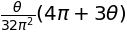

In [88]:
simplify(b)

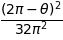

In [34]:
simplify(a)

In [37]:
q = expand(a) + expand(b)

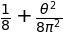

In [38]:
q

In [39]:
2*integrate(q/(2*pi), (theta,-pi, pi))

#### Exhaustive Enumeration  Solution

Let A and B be represented by 2 points on the circle. Say there are $d$ number of people in one of the arcs connecting  A and  B. So we have  $n-d-2$ people in the other arc connecting A and B. Notice how for every pair of points chosen from one arc, there exists exactly one solution, whereas no solutions exist for any pair of points picked from both the arcs.

The required answer therefore is $$\sum_{d=0}^{n-2} {n-d-2 \choose 2} + {d \choose 2}/(n-1)!  $$

I couldn't simplify this further but Sympy evaluated this to 1/3 for all values of n I plugged in.

In [48]:
from sympy import binomial, factorial, Sum

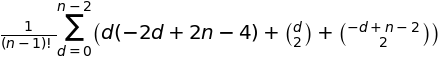

In [68]:
Sum(binomial(n-d-2,2) + binomial(d,2) + 2*(n-d-2)*d, (d,0,n-2))/factorial(n-1)

In [84]:
(Sum(simplify(binomial(5-j-2,2) + binomial(j,2)), (j,0,5-2))/factorial(4)).doit()

###  Verification (Sort Of)

Not efficient but does the job. 

In [89]:
from itertools import permutations
from math import factorial

In [90]:
def validConf(conf):
    return 1 if \
    ((conf.index('a1') < conf.index('b1') < conf.index('b2') < conf.index('a2')) or\
    (conf.index('a1') < conf.index('b2') < conf.index('b1') < conf.index('a2')) or\
    (conf.index('a1') < conf.index('a2') < conf.index('b1') < conf.index('b2')) or\
    (conf.index('a1') < conf.index('a2') < conf.index('b2') < conf.index('b1')))\
    else 0

In [29]:
def probCrossFire(n):
    nPlus4People = ['a1', 'b1', 'a2', 'b2'] +\
                    [str(number) for number in range(1,n+1)]
    allArrangements = list(permutations(nPlus4People))
    cyclicArrangements = allArrangements[0:factorial(n+3)]
    noCrossFire = sum([validConf(arrangement) for arrangement in cyclicArrangements])
    return 1 - noCrossFire/len(cyclicArrangements)
    #return len(list(filter(lambda f: validConf(f),allArrangements))) / len(allArrangements)

In [91]:
probCrossFire(5)